In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/NLP

/content/drive/.shortcut-targets-by-id/10jQIuTiIEwNUYyC2tiVRcsH1-ND-ng9R/NLP


In [4]:
df=pd.read_csv("/content/drive/MyDrive/NLP/csv/UpdatedResumeDataSet.csv")


In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<Axes: xlabel='count', ylabel='Category'>

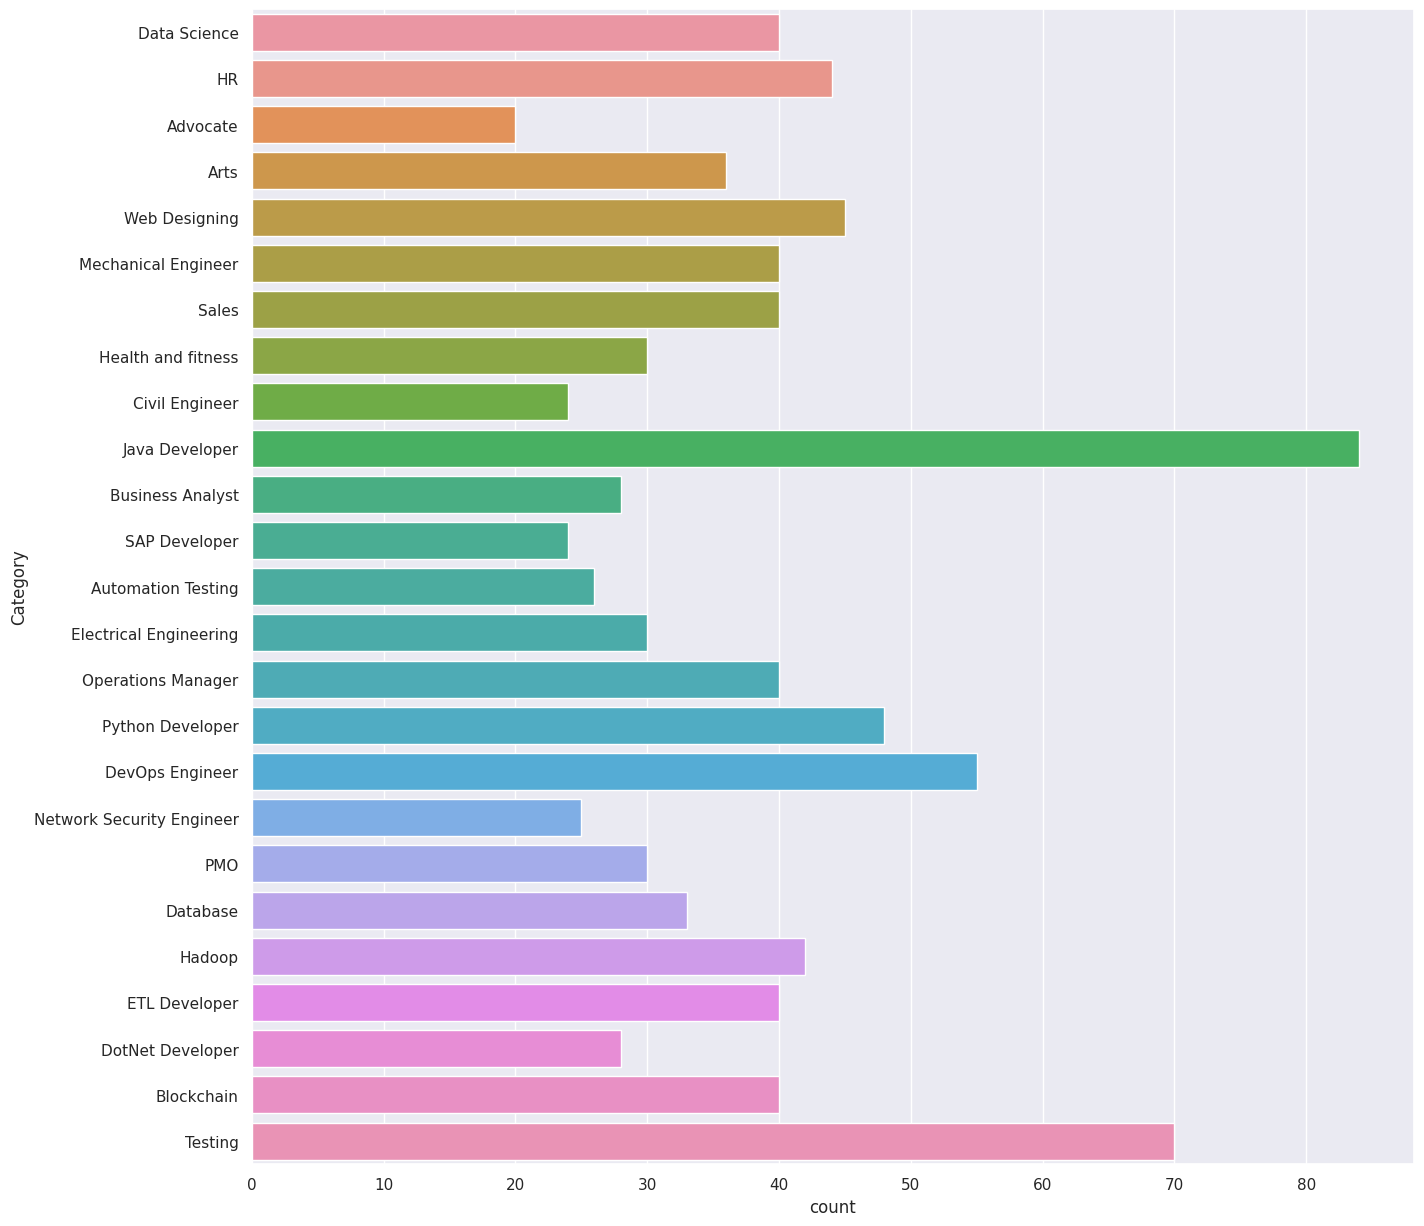

In [6]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(y=df["Category"])

In [7]:
df2=df

In [8]:

# Combine all resumes into a single string
all_text = ' '.join(df['Resume'])

In [9]:
# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)


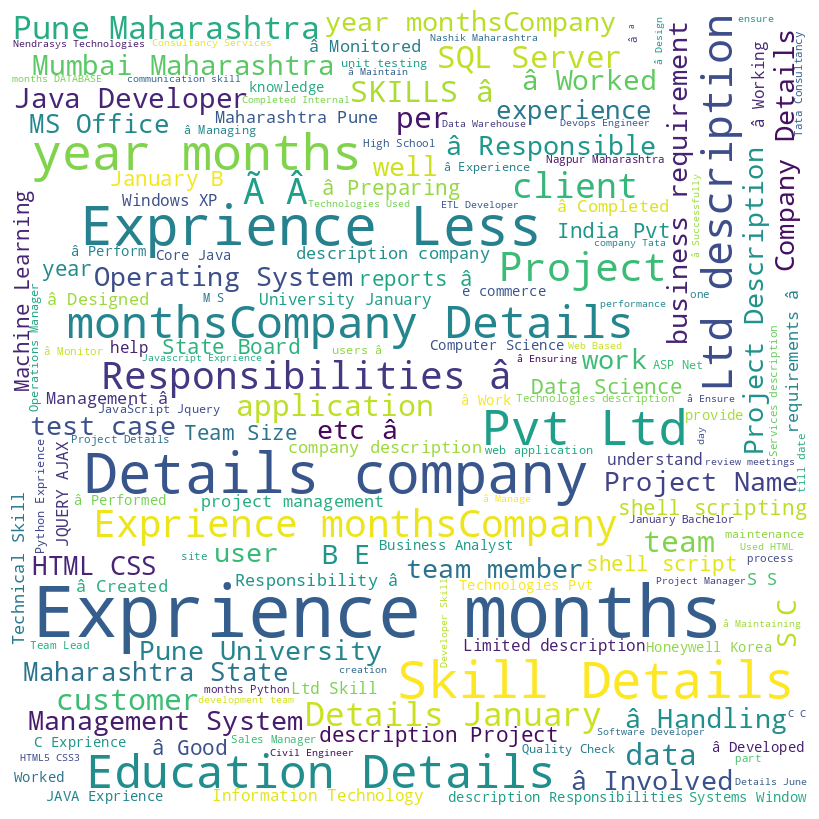

In [10]:
# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [11]:
# Define the function for cleaning text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords from the text
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Remove unnecessary punctuations
    words = [word for word in words if word not in string.punctuation]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

# Apply the cleaning function to the resume column and create a new column called resume_cleaned
df['resume_cleaned'] = df['Resume'].apply(clean_text)

In [12]:
# Preprocessing the data
# Preprocessing the data
def preprocess_text(sentence_list):
  lines_list = []
  stop_words = set(stopwords.words('english'))

  for line in sentence_list:
      line = line.lower()
      #tokenize the text documents and update the lists word_list and lines
      words=[]
      for word in word_tokenize(line):
        if word.isalpha():
          if word not in stop_words:
            words.append(word)
      lines_list.append(' '.join(words))
  
  return lines_list

# Preprocessing the data
# def preprocess_text(sentence_list):
#     lines = [] 
#     word_list = [] 
#     lemmatizer = WordNetLemmatizer()

#     for line in sentence_list:
        
#         words=[]
#         for word in word_tokenize(line):
#             if word.isalpha():
#                 lemma = lemmatizer.lemmatize(word.lower())
#                 words.append(lemma)
#                 if lemma not in word_list:
#                     word_list.append(lemma)
#         lines.append(' '.join(words))

#     return lines
# lines = [] 
# word_list = [] 
# st = PorterStemmer()

# for line in df['Resume']:
#     #tokenize the text documents and update the lists word_list and lines
#     words=[]
#     for word in word_tokenize(line):
#         if word.isalpha():
#             words.append(word.lower())
#             if word.lower() not in word_list:
#                 word_list.append(word.lower())
#     lines.append(' '.join(words))
 
# df['Resume_tokenized'] = lines

In [13]:
df['resume_preprocessed'] = preprocess_text(df['Resume'])

In [14]:
df.head()

,Category,Resume,resume_cleaned,resume_preprocessed
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b.e uit-rgp...,education details may may data scientist data ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,education details mca ymcaust faridabad haryan...


In [15]:
df['Category_no'] = df.groupby('Category').ngroup()
df.head()

,Category,Resume,resume_cleaned,resume_preprocessed,Category_no
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b.e uit-rgp...,education details may may data scientist data ...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,areas interest deep learning control system de...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,education details mca ymcaust faridabad haryan...,6


In [16]:
from sklearn.model_selection import train_test_split


In [17]:

X_train, X_test, y_train, y_test = train_test_split(
    df.resume_preprocessed,
    df.Category_no,
    test_size = 0.2,
    random_state=2023,
    stratify=df.Category_no
)

In [18]:
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [19]:
# Using KNN
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, workers=4):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers

    def fit(self, X, y=None):
        sentences = [s.split() for s in X]
        self.word2vec_model = Word2Vec(sentences,
                                       vector_size=self.vector_size,
                                       window=self.window,
                                       min_count=self.min_count,
                                       workers=self.workers)
        return self

    def transform(self, X):
        X_transformed = []
        if isinstance(X, str):
            X = [X]
        for s in X:
            if isinstance(s, str):
                vec = [self.word2vec_model.wv[w] for w in s.split() if w in self.word2vec_model.wv]
                vec = np.mean(vec, axis=0) if vec else np.zeros(self.vector_size)
                X_transformed.append(vec)
        if not X_transformed:
            X_transformed = [np.zeros(self.vector_size)]
        return np.array(X_transformed)

clf = Pipeline([
    ('word2vec', Word2VecTransformer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      1.00      1.00         7
           2       1.00      0.40      0.57         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         8
           7       0.71      0.71      0.71         7
           8       0.79      1.00      0.88        11
           9       0.50      0.40      0.44         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       0.69      1.00      0.82         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       0.89      1.00      0.94         8
          17       1.00    

In [20]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
    ('word2vec', Word2VecTransformer()),
    ('Random Forest', RandomForestClassifier())
])

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       0.85      1.00      0.92        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    

In [21]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.preprocessing import DenseTransformer

clf_gnb = Pipeline([
    ('Word2Vec', Word2VecTransformer()),
    ('to_dense', DenseTransformer()),
    ('GNB', GaussianNB())
])

clf_gnb.fit(X_train, y_train)

y_pred_gnb = clf_gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.55      0.86      0.67         7
           2       1.00      0.60      0.75         5
           3       0.80      1.00      0.89         8
           4       0.67      0.67      0.67         6
           5       0.50      0.40      0.44         5
           6       1.00      1.00      1.00         8
           7       1.00      0.86      0.92         7
           8       0.70      0.64      0.67        11
           9       0.00      0.00      0.00         5
          10       1.00      0.25      0.40         8
          11       1.00      1.00      1.00         6
          12       0.82      1.00      0.90         9
          13       0.70      0.88      0.78         8
          14       0.75      0.50      0.60         6
          15       0.59      0.59      0.59        17
          16       0.67      0.75      0.71         8
          17       1.00    

In [22]:
pip install PyPDF2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import PyPDF2

In [24]:
# Testing from a new resume
from PyPDF2 import PdfReader

def extract_information(pdf_path):
    reader = PdfReader(pdf_path)
    number_of_pages = len(reader.pages)
    page = reader.pages[0]
    pdf_text = page.extract_text()
    
    return pdf_text

In [25]:
pdf_import = extract_information('/content/drive/MyDrive/NLP/csv/test/data-scientist-resume-example.pdf')

In [26]:
test_pdf = []
test_pdf.append(pdf_import)

cleaned_pdf = preprocess_text(test_pdf)

In [27]:
# Testing the model

y_pred_test = clf.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])

[6]
Category of predicted resume is :  Data Science


In [28]:
y_pred_test = clf2.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])

[18]
Category of predicted resume is :  Operations Manager


In [29]:
y_pred_test = clf_gnb.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])

[21]
Category of predicted resume is :  SAP Developer


In [30]:
from sklearn.metrics.pairwise import cosine_similarity


In [31]:
job_description='At Swickard Auto Group, we’re passionate about our customers and using the most innovative, cutting-edge technology to revolutionize the way customers purchase and service their vehicles at our dealerships. Our customers are the reason we’re here. Our culture is defined by a few core principles: We want to be our customers’ favorite place to purchase, lease, or service their vehicle, and we want to be your favorite place to work! We are a hospitality company that happens to be in the automotive industry. We are data-driven, and our aim is to use data to continuously improve the in-store and online guest experience with our dealerships. Automotive News ranks Swickard Auto Group as one of the top dealer groups in the US. We are looking for like-minded team members that are laser focused on discovering insights in data to identify ways we can continue improving each interaction with our customers. Swickard’s unique perspective on automotive retail strategy is transforming the automotive industry and we are looking for top-notch individuals to join our fast-growing team. This position will support all of the data reporting requests of our growing Retail Strategy team within Swickard Auto Group. The Retail Strategy team is tasked with implementing strategic initiatives that help improve the business efficiency and customer experience across the entire organization. The daily and monthly reports that this position generates and maintains will be critical in our decision-making process. The ideal candidate will have advanced Excel skills, an analytical mindset, great attention to detail, and be comfortable dealing with high amounts of ambiguity. Duties and Responsibilities Use data mining to extract information and identify patterns or trends Blend data from multiple systems to prepare reports for upper management and dealerships Publish monthly and ad-hoc reports for management team Build reports and reconcile to system data Perform statistical analysis of data; monitor data quality Qualifications 2 years of related experience in a reporting role Bachelor’s Degree (accredited school) with emphasis in: Information Technology, Mathematics, Management Information System (MIS), Statistics, or Business Administration Strong attention to detail and a high degree of accuracy Ability to communicate well both verbally and in writing with all levels of the organization Strong analytical skills Solid understanding of data sources, data organization and storage Knowledge of statistical methodologies and data analysis techniques Must have advanced Excel skills The ideal candidate will also have experience with: Database and SQL, preferred Power BI, Tableau, or Alteryx, a plus! Swickard offers a competitive package - salary and benefits - including but not limited to medical, dental, vision, life and pet insurance, optional disability coverage, paid holidays and vacation time and a 401K plan. Come join us - be part of an amazing culture that’s transforming the way customers feel about buying or leasing their next vehicle. You’ll be working alongside other talented individuals with the same vision and commitment – together we’ll drive toward a shared goal of giving our customers an exceptional experience. And at Swickard, as an equal opportunity and affirmative action employer, we ensure everyone is welcome and provided an environment to be successful and included. We are committed to equal employment opportunity regardless of race, color, national or ethnic origin, age, religion, disability, sexual orientation, gender, gender identity and expression, marital status, and any other characteristic protected under applicable State or Federal laws and regulations. To all recruitment agencies: Swickard does not accept agency resumes. Please do not forward resumes to our careers alias or other Swickard employees. Swickard is not responsible for any fees related to unsolicited resumes. Education: Bachelors (Required) Experience: Data analytics: 2 years (Preferred) Python: 2 years (Preferred) R: 2 years (Preferred) SQL: 2 years (Preferred) Data visualization: 2 years Location: One location'


In [32]:
job_descriptionpp = clean_text(job_description)

In [33]:
df_data_science = df[df['Category'] == 'Data Science']


In [34]:
similarity_scores = []


In [35]:
w2v_transformer = Word2VecTransformer()


In [36]:
w2v_model = Word2Vec(sentences=df_data_science, vector_size=100, window=5, min_count=1, epochs=5)
w2v_transformer = Word2VecTransformer()
w2v_transformer.word2vec_model = w2v_model

In [37]:
def get_similarity_scores(job_description, w2v_transformer, df_data_science):
    similarity_scores = []
    
    # preprocess job description
    job_description_pp = clean_text(job_description)
    job_desc_vector = w2v_transformer.transform([job_description_pp])[0]
    
    for selected_resume in df_data_science['resume_preprocessed']:
        # preprocess selected_resume
        selected_resume_pp = clean_text(selected_resume)
        selected_resume_vector = w2v_transformer.transform([selected_resume_pp])[0]

        # calculate cosine similarity
        similarity_score = cosine_similarity(selected_resume_vector.reshape(1, -1), 
                                              job_desc_vector.reshape(1, -1))[0][0]

        similarity_scores.append(similarity_score)
        
    return similarity_scores


In [38]:
similarity_scores = get_similarity_scores(job_description, w2v_transformer, df_data_science)

In [39]:
df_data_science['similarity_scores']=similarity_scores

<ipython-input-39-d3af722f9c61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_science['similarity_scores']=similarity_scores


In [40]:
df_data_science

,Category,Resume,resume_cleaned,resume_preprocessed,Category_no,similarity_scores
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,skills programming languages python pandas num...,6,0.082018
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b.e uit-rgp...,education details may may data scientist data ...,6,0.000000
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,areas interest deep learning control system de...,6,0.000000
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,education details mca ymcaust faridabad haryan...,6,0.000000
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skill c basic iot python matlab data science m...,skills c basics iot python matlab data science...,6,0.094300
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education detail b.tech rayat bahra institute ...,education details rayat bahra institute engine...,6,0.176540
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skill â¢ ability quickly grasp techn...,personal skills ability quickly grasp technica...,6,0.000000
9,Data Science,Expertise â Data and Quantitative Analysis â...,expertise â data quantitative analysis â d...,expertise data quantitative analysis decision ...,6,0.233425


In [41]:
top_10_resumes = df_data_science.sort_values('similarity_scores', ascending=False).head(10)


In [42]:
top_10_resumes

,Category,Resume,resume_cleaned,resume_preprocessed,Category_no,similarity_scores
33,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
23,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
36,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
26,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
16,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
19,Data Science,Expertise â Data and Quantitative Analysis â...,expertise â data quantitative analysis â d...,expertise data quantitative analysis decision ...,6,0.233425
29,Data Science,Expertise â Data and Quantitative Analysis â...,expertise â data quantitative analysis â d...,expertise data quantitative analysis decision ...,6,0.233425


In [43]:
top_10_resumes.to_csv("test.csv")

In [44]:
ls

 Bert_classification.ipynb      pkl/
 bert_similari.pynb            'Project Proposal.gdoc'
'Brainstorm notes .gdoc'       'Research Papers'/
 classfication__final_2.ipynb   test.csv
 csv/                           TF_IDF_Final.ipynb
 Demo.ipynb                     TF_IDF_similarity.ipynb
 helper_function/               Untitled
 NLLP_resume.ipynb             'Untitled presentation.gslides'
 Notes/                         Word2Vec.ipynb


In [45]:
pip install rbo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from rbo import rbo


In [47]:
java_desc = "Job Description  Synergistic ITis an organization focusing on Java/J2EE domain and providing technically skilled and competent candidates to clients in Northern America and Canada since 2010. From staffing to full implementation of projects we provide the highest quality IT Services. Job Overview- As a Web programmer, you should write clean code to ensure our programs run properly and address our company needs. You'll be responsible for designing, coding and improving web pages, programs, and applications. Position-  · Executing full lifecycle software development  · Long term positions with excellent pay rates.  · No relocation  · Active positions with Fortune 500 Clients  · Able to convert our company needs in functional and user-friendly websites and programs  · Salary ranging $75K-$100K/yr.  The Requirements-  · BS/MS/AS in CS/IT/CE  · Ability to perform in a team environment  · Positive attitude with good comm. Skills  · Familiarity working with C, C++, Core Java etc"

In [48]:
job_desc_pp = clean_text(job_description)


In [49]:
job_desc_ppp = preprocess_text(job_description)

In [50]:
javaresumes = pd.read_csv('/content/drive/MyDrive/NLP/csv/rbonik.csv')


In [51]:
javaresumes.head()

,Category,Resume
0,Java Developer,Eleanor Mccartney\n\n4522 Davisson Street\nRus...
1,Java Developer,Curtis Samuel (123) 456-7890 csamuel@example.c...
2,Java developer,SWATHI RUCHIRA\nView Portfolio mswathi.ruchira...
3,Java Developer,"SOHA VANKUDRE\nBoston, MA | Ph: +1(857)-381-54..."
4,Java Developer,Venkata Bhargavi S\nBoston MA • (339) 224-1508...


In [52]:
javaresumes['resume_cleaned'] = javaresumes['Resume'].apply(clean_text)

In [53]:
javaresumes.head()

,Category,Resume,resume_cleaned
0,Java Developer,Eleanor Mccartney\n\n4522 Davisson Street\nRus...,eleanor mccartney 4522 davisson street rushvil...
1,Java Developer,Curtis Samuel (123) 456-7890 csamuel@example.c...,curtis samuel 123 456-7890 csamuel example.com...
2,Java developer,SWATHI RUCHIRA\nView Portfolio mswathi.ruchira...,swathi ruchira view portfolio mswathi.ruchira ...
3,Java Developer,"SOHA VANKUDRE\nBoston, MA | Ph: +1(857)-381-54...",soha vankudre boston ph +1 857 -381-5447 vanku...
4,Java Developer,Venkata Bhargavi S\nBoston MA • (339) 224-1508...,venkata bhargavi boston • 339 224-1508 • sikha...


In [54]:
def get_similarity_scores(job_description, w2v_transformer, javaresumes):
    similarity_scores = []
    
    # preprocess job description
    job_description_pp = clean_text(job_description)
    job_desc_vector = w2v_transformer.transform([job_description_pp])[0]
    
    for selected_resume in javaresumes['resume_cleaned']:
        # preprocess selected_resume
        selected_resume_pp = clean_text(selected_resume)
        selected_resume_vector = w2v_transformer.transform([selected_resume_pp])[0]

        # calculate cosine similarity
        similarity_score = cosine_similarity(selected_resume_vector.reshape(1, -1), 
                                              job_desc_vector.reshape(1, -1))[0][0]

        similarity_scores.append(similarity_score)
        
    return similarity_scores

In [55]:
similarity_scoresjava = get_similarity_scores(job_description, w2v_transformer, javaresumes)

In [56]:
javaresumes['similarity_scores']=similarity_scoresjava

In [57]:
pip install --upgrade pyrbo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Requirement already up-to-date: pyrbo in /usr/local/lib/python3.9/dist-packages (10)


In [58]:
import numpy as np
import pyrbo


In [59]:
javaresumes

,Category,Resume,resume_cleaned,similarity_scores
0,Java Developer,Eleanor Mccartney\n\n4522 Davisson Street\nRus...,eleanor mccartney 4522 davisson street rushvil...,0.176540
1,Java Developer,Curtis Samuel (123) 456-7890 csamuel@example.c...,curtis samuel 123 456-7890 csamuel example.com...,0.000000
2,Java developer,SWATHI RUCHIRA\nView Portfolio mswathi.ruchira...,swathi ruchira view portfolio mswathi.ruchira ...,0.176540
3,Java Developer,"SOHA VANKUDRE\nBoston, MA | Ph: +1(857)-381-54...",soha vankudre boston ph +1 857 -381-5447 vanku...,0.176540
4,Java Developer,Venkata Bhargavi S\nBoston MA • (339) 224-1508...,venkata bhargavi boston • 339 224-1508 • sikha...,0.176540
5,Java Developer,EDUCATION\nDINESH SAI PAPPURU\n+1(857) 313-502...,education dinesh sai pappuru +1 857 313-5024 ⋄...,0.359366
6,Java Developer,"Nikitha Kanaparthi\nBoston, MA. 02120 • +1 (20...",nikitha kanaparthi boston 02120 • +1 202 23660...,0.359366
7,Java Developer,VIGNAN VENNAMPALLY vennampally.v@northeastern....,vignan vennampally vennampally.v northeastern....,0.357407
8,Java Developer,Hani Haider\nPhone: 781-491-3977 | Email: haid...,hani haider phone 781-491-3977 email haider.sy...,0.373112
9,Java Developer,ARTHI REDDY ALLAM\n703-509-1781 arthi@vt.edu\n...,arthi reddy allam 703-509-1781 arthi vt.edu ed...,0.000000


In [60]:
!pip install rbp



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:


# Generate the ranked list of resumes based on cosine similarity
ranked_resumes = np.array([8, 5, 6, 7, 0, 2, 3, 4, 1, 9])

# Define the ground truth ranking of the resumes based on human judgment
ground_truth = np.array([0, 1, 3, 4, 5, 7, 2, 8, 6, 9])



In [62]:
rbo.RankingSimilarity(ranked_resumes, ground_truth).rbo()

0.4489285714285714